λ_0= 0.0001 i= 17561 Bs[i]=  2.021266071162e-01 Bs[i-1]=  2.021266074645e-01 Δ= -3.483024424433e-10
λ_0= 0.0002 i= 17561 Bs[i]=  2.021253158980e-01 Bs[i-1]=  2.021253165329e-01 Δ= -6.348797321198e-10
λ_0= 0.0003 i= 17561 Bs[i]=  2.021240247112e-01 Bs[i-1]=  2.021240256329e-01 Δ= -9.217113461357e-10
λ_0= 0.0004 i= 17561 Bs[i]=  2.021227335268e-01 Bs[i-1]=  2.021227347354e-01 Δ= -1.208608824133e-09
λ_0= 0.0005 i= 17561 Bs[i]=  2.021214423393e-01 Bs[i-1]=  2.021214438348e-01 Δ= -1.495534418527e-09
λ_0= 0.0006 i= 17561 Bs[i]=  2.021201511466e-01 Bs[i-1]=  2.021201529291e-01 Δ= -1.782475611556e-09
λ_0= 0.0007 i= 17560 Bs[i]=  2.021188620174e-01 Bs[i-1]=  2.021188622234e-01 Δ= -2.059611647898e-10
λ_0= 0.0008 i= 17560 Bs[i]=  2.021175710994e-01 Bs[i-1]=  2.021175715922e-01 Δ= -4.928632502121e-10
λ_0= 0.0009 i= 17560 Bs[i]=  2.021162801747e-01 Bs[i-1]=  2.021162809545e-01 Δ= -7.797713308388e-10
λ_0= 0.001 i= 17560 Bs[i]=  2.021149892433e-01 Bs[i-1]=  2.021149903100e-01 Δ= -1.066684574003e-09
λ

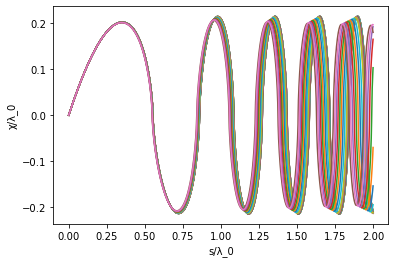

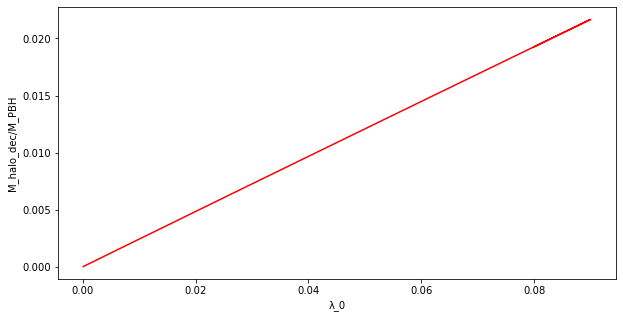

In [1]:
# Attempt to estimate the mass of the DM halos in the equal-mass PBH binary at the point of decoupling for
# PBH binary decoulping early in the radiation era using eqs.(43),(50) & (53) in reference 
# pdf "PBH binary" .

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math


π=np.pi
t_eq=1.59246e12       # in units of seconds
rho_eq=2.15368e-16    # in units of kg.m^-3
G=6.67e-11            # in units of m^3.kg^-1.s^-2
M_PBH=1e32            # in kg
a_eq=2.9374e-4        # scale factor corresponding to matter radiation equlaity

def M_halo(s):    #Mass of the DM halo given by eq.(43) in reference pdf "PBH binary".
    return ((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*M_PBH*(2**(3/4))*s)




def n_r(s):
    return (1+((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*(2**(3/4))*s)) #eq.(57) in reference pdf "PBH binary".
def  k_r(s):
    return (1/n_r(s))
def λ_r(s):
    return λ_0*k_r(s)

λ_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,
          0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.09,0.08]
for λ_0 in λ_list:
    def s_dec(λ_0):
        def f(u,s,λ_0):
            return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ_r(s)*((u[0]**2+b**2)**(3/2))))]
        separation0= [1e-12,1]
        b= ((λ_0)/1000)
        ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
        us= odeint(f,separation0,ss,args=( λ_0,))
        separations= us[:,0]
        As=ss/λ_0
        Bs=separations/λ_0
        plt.plot(As,Bs,'')
        plt.xlabel('s/λ_0')
        plt.ylabel('χ/λ_0')
        Bs_list = Bs.tolist() 
        As_list = As.tolist()
        for i in  range(1,len(Bs_list)):
            Δ=(Bs[i] - Bs[i-1])
            if Δ<0:
                print("λ_0=",λ_0,"i=",i,"Bs[i]= ",'%.12e'%Bs[i],"Bs[i-1]= ",'%.12e'%Bs[i-1],"Δ=",'%.12e'%Δ)
                # to make sure of the above step, I printed out the index, "i" & "χ/λ_0" values given 
                # by Bs, corresponding to which I am getting the s_dec/λ_0 (which is As[i]) value for 
                # each λ_0.
                break
        s_dec= (λ_0*As[i])
        return s_dec
    
            
            
    
s_dec_list=np.zeros(len(λ_list))    
M_halo_dec_list = np.zeros(len(λ_list))
M_halo_dec_by_M_PBH = np.zeros(len(λ_list))

for i, λ_0 in enumerate(λ_list):
    s_dec_list[i] = s_dec(λ_0)
    
for i,s in enumerate(s_dec_list):
    M_halo_dec_list[i]= M_halo(s)
    M_halo_dec_by_M_PBH[i]=((M_halo(s))/M_PBH)
print("λ_0=",λ_list)
print("s_dec =",s_dec_list,)
print("M_halo_dec =",M_halo_dec_list,"kg")
print("M_halo_dec/M_PBH =",M_halo_dec_by_M_PBH)
plt.figure(figsize=(10,5))
plt.plot(λ_list,M_halo_dec_by_M_PBH,'r')
plt.xlabel('λ_0')
plt.ylabel('M_halo_dec/M_PBH')
plt.show()

λ_0= 1.0 i= 18482 Bs[i]=  2.073167464761e-01 Bs[i-1]=  2.073167477843e-01 Δ= -1.308271824207e-09
λ_0= 1.5 i= 19138 Bs[i]=  2.131722473599e-01 Bs[i-1]=  2.131722481393e-01 Δ= -7.793278244961e-10
λ_0= 2.0 i= 19772 Bs[i]=  2.188784114446e-01 Bs[i-1]=  2.188784127233e-01 Δ= -1.278698591456e-09
λ_0= 2.5 i= 20384 Bs[i]=  2.244411212525e-01 Bs[i-1]=  2.244411216887e-01 Δ= -4.362444849804e-10
λ_0= 3.0 i= 20977 Bs[i]=  2.298676122124e-01 Bs[i-1]=  2.298676126822e-01 Δ= -4.697306987822e-10
λ_0= 3.5 i= 21552 Bs[i]=  2.351647464324e-01 Bs[i-1]=  2.351647471871e-01 Δ= -7.546629987587e-10
λ_0= 4.0 i= 22110 Bs[i]=  2.403387409350e-01 Bs[i-1]=  2.403387418801e-01 Δ= -9.451005533734e-10
λ_0= [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
s_dec = [0.3696437  0.57414574 0.79088791 1.01921019 1.25863259 1.50865509
 1.76881769]
M_halo_dec = [2.41810552e+31 3.66318691e+31 4.92774732e+31 6.20884240e+31
 7.50474656e+31 8.81371351e+31 1.01342800e+32] kg
M_halo_dec/M_PBH = [0.24181055 0.36631869 0.49277473 0.62088424 0.75

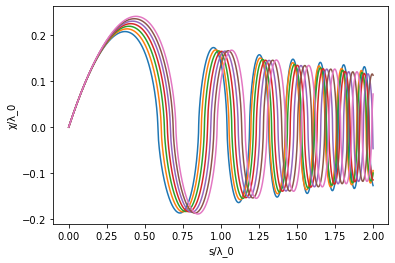

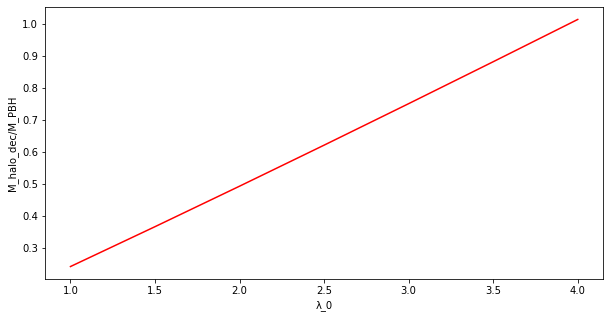

In [3]:
# Attempt to estimate the mass of the DM halos in the equal-mass PBH binary at the point of decoupling for
# PBH binary decoulping later around matter-radiation equality using eqs.(42),(47)& (53) in reference 
# pdf "PBH binary" .


def M_halo(s):               #eq.(42) in reference pdf "PBH binary".
    return (((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))*M_PBH* math.sqrt((((2/3)*(s-2)
                                    *math.sqrt(s+1))+(4/3)))

def h(x):
    return math.sqrt((x**-3)+(x**-4))   
def g(x):
    return  -((3*x+4)/(2*h(x)*(x**5))) #g(x)=h'(x).
def n(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))
                    #eq.(56) in reference pdf "PBH binary".

def  k(s):
    return (1/n(s))

def λ(s):
    return λ_0*k(s)
   
λ_list=[1.0,1.5,2.0,2.5,3.0,3.5,4.0]
for λ_0 in λ_list:
    def s_dec(λ_0):
        def f(u,s,λ_0):
             return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(s)
                     *((u[0]**2+b**2)**(3/2))))]
        separation0= [1e-12,1]
        b= (3*λ_0)/100000
        ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
        us= odeint(f,separation0,ss,args=( λ_0,))
        separations= us[:,0]
        As=ss/λ_0
        Bs=separations/λ_0
        plt.plot(As,Bs,'')
        plt.xlabel('s/λ_0')
        plt.ylabel('χ/λ_0')
        Bs_list = Bs.tolist()
        As_list = As.tolist()
        for i in  range(1,len(Bs_list)):
            Δ=(Bs[i] - Bs[i-1])
            if Δ<0:
                print("λ_0=",λ_0,"i=",i,"Bs[i]= ",'%.12e'%Bs[i],"Bs[i-1]= ",'%.12e'%Bs[i-1],"Δ=",'%.12e'%Δ)
                # same as  the previous case,to make sure of the above step, I printed out the index, 
                # "i" & "χ/λ_0" values given by Bs, corresponding to which I am getting the s_dec/λ_0 
                # (which is  basically As[i]) for each λ_0.
                break
        s_dec= (λ_0*As[i])
        return s_dec
    
    
    
s_dec_list=np.zeros(len(λ_list))    
M_halo_dec_list = np.zeros(len(λ_list))
M_halo_dec_by_M_PBH = np.zeros(len(λ_list))

for i, λ_0 in enumerate(λ_list):
    s_dec_list[i] = s_dec(λ_0)
    
for i,s in enumerate(s_dec_list):
    M_halo_dec_list[i]= M_halo(s)
    M_halo_dec_by_M_PBH[i]=((M_halo(s))/M_PBH)
print("λ_0=",λ_list)
print("s_dec =",s_dec_list,)
print("M_halo_dec =",M_halo_dec_list,"kg")
print("M_halo_dec/M_PBH =",M_halo_dec_by_M_PBH)
plt.figure(figsize=(10,5))
plt.plot(λ_list,M_halo_dec_by_M_PBH,'r')
plt.xlabel('λ_0')
plt.ylabel('M_halo_dec/M_PBH')
plt.show()   